In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf

from magenta.models.image_stylization import image_utils
from magenta.models.image_stylization import model

# Select an image (any jpg or png).
input_image = image_utils.load_np_image('evaluation_images/bkk.jpg')

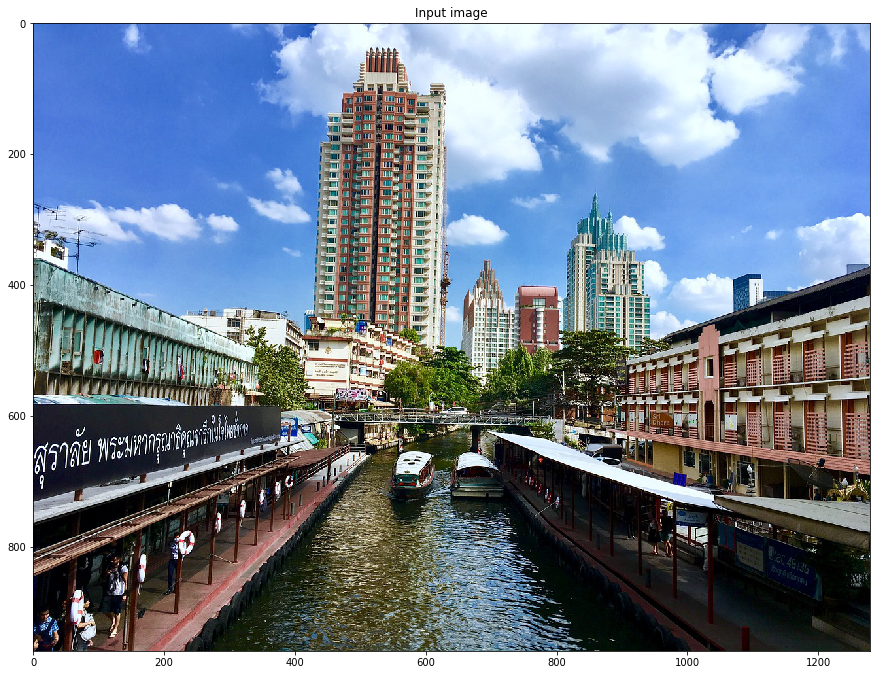

In [6]:
_, sp = plt.subplots(figsize=(15, 15))

sp.imshow(input_image)
sp.set_title('Input image')

plt.show()

In [3]:
checkpoint = 'checkpoints/multistyle-pastiche-generator-varied.ckpt'
num_styles = 32  # Number of images in checkpoint file.

which_styles = 1 # Choose the style

image = np.expand_dims(input_image, 0)

with tf.Graph().as_default(), tf.Session() as sess:
    stylized_images = model.transform(image,
        normalizer_params={
            'labels': tf.constant(np.array([which_styles])),
            'num_categories': num_styles,
            'center': True,
            'scale': True})
    model_saver = tf.train.Saver()
    model_saver.restore(sess, checkpoint)
    stylized_images = stylized_images.eval()

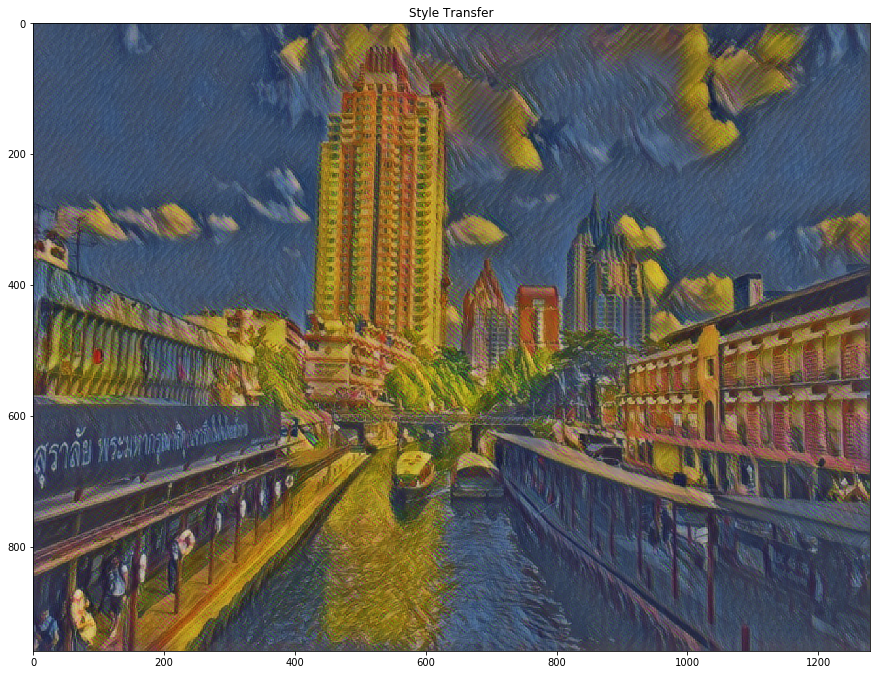

In [5]:
_, sp = plt.subplots(figsize=(15, 15))

sp.imshow(stylized_images[0])
sp.set_title('Style Transfer')

plt.show()